In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Posiciones y masas de las galaxias de Gadget

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np
import barstrength2 as strng

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]


path = '/mnt/is2/alejandro/ornella/'

snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')

for i in range(0,2):
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.

#----------------------masas----------------------------
    mstr = mstr/h

    r200 = r200*aexp[0]/h
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]             

#--------------------------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[0])

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz
    
    corte, = np.where(r < 3*aexp[0])

    A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

    xx = xn*cos(phimax)+yn*sin(phimax)
    yy = xn*-sin(phimax)+yn*cos(phimax)
    zz = zn
    
    pos=np.ndarray([4,np.size(xx)])
    pos[0,:]=xx
    pos[1,:]=yy
    pos[2,:]=zz
    pos[3,:]=mstr

#     np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_pos-mass2.dat', pos, fmt='%12.6f')
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_pos-mass4.dat', pos, fmt='%12.6f')
    
##pos-mass2.dat guarda los datos rotados el angulo phi (el semieje mayor esta alineado con el eje x)
##pos-mass3.dat guarda las posiciones de las particulas pero con la rotacion en 3*aexp en lugar de r90
##pos-mass4.dat guarda las posiciones de las particulas rotadas el angulo phi pero con la rotacion en 3*aexp en lugar de r90

## Posiciones y masas de las particulas de gasoline

In [4]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
import barstrength2 as strng


a0=1
vector2 = ('M31','MW','M33')
vector = (1,2,4)

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snap = h5py.File(path + 'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,2):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value

    pstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]-cm[0]
    ystr = pstr[:,1]-cm[1]
    zstr = pstr[:,2]-cm[2]
    r = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0]
    v_y = vel[:,1]
    v_z = vel[:,2]

#----------------------masas----------------------------
    r200 = r200*aexp
    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]
    M90 = Mc_str[noventa]                

#------------------masa total en r200 (Mvir)--------------------------         
    veloc,=np.where(r<r50)

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp)

##posiciones de partículas que se quiere graficar
##como lo de arriba me da los versores hago las posiciones con esto 

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

    corte, = np.where(r < 3*aexp)

    A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

    xx = xn*cos(phimax)+yn*sin(phimax)
    yy = xn*-sin(phimax)+yn*cos(phimax)
    zz = zn
    
    pos=np.ndarray([4,np.size(xx)])
    pos[0,:]=xx
    pos[1,:]=yy
    pos[2,:]=zz
    pos[3,:]=mstr

#     np.savetxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_pos-mass3.dat', pos, fmt='%12.6f')
    np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_pos-mass4.dat', pos, fmt='%12.6f')
    
##pos-mass2.dat guarda los datos rotados el angulo phi (el semieje mayor esta alineado con el eje x)
##pos-mass3.dat guarda las posiciones de las particulas pero con la rotacion en 3*aexp en lugar de r90
##pos-mass4.dat guarda las posiciones de las particulas rotadas el angulo phi pero con la rotacion en 3*aexp en lugar de r90

In [10]:
import sphviewer as sph
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

#path = 'home/ornela/PYTHON/'
path = '/home/omarioni/'


M31_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_pos-mass4.dat')
x_M31gd = M31_gd[0,:]
y_M31gd = M31_gd[1,:]
z_M31gd = M31_gd[2,:]
m_M31gd = M31_gd[3,:]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_pos-mass4.dat')
x_MWgd = MW_gd[0,:]
y_MWgd = MW_gd[1,:]
z_MWgd = MW_gd[2,:]
m_MWgd = MW_gd[3,:]

M31_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_pos-mass4.dat')
x_M31gs = M31_gs[0,:]
y_M31gs = M31_gs[1,:]
z_M31gs = M31_gs[2,:]
m_M31gs = M31_gs[3,:]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_pos-mass4.dat')
x_MWgs = MW_gs[0,:]
y_MWgs = MW_gs[1,:]
z_MWgs = MW_gs[2,:]
m_MWgs = MW_gs[3,:]


In [11]:
R_M31gd = np.sqrt(x_M31gd**2 + y_M31gd**2 + z_M31gd**2)
R_MWgd  = np.sqrt(x_MWgd**2  + y_MWgd**2  + z_MWgd**2)
R_M31gs = np.sqrt(x_M31gs**2 + y_M31gs**2 + z_M31gs**2)
R_MWgs  = np.sqrt(x_MWgs**2  + y_MWgs**2  + z_MWgs**2)

In [12]:
salto = 0.25
desde = -10
hasta = 10

bine  = frange( desde, hasta, salto)
# print bine
abine = frange(desde + salto/2., hasta + salto/2., salto)
# print len(bine), len(abin)

smax = salto
smin = -salto

area_bines = (smax-smin)*salto

In [13]:
masax_M31gd = np.zeros([len(bine)])
masay_M31gd = np.zeros([len(bine)])

masax_MWgd = np.zeros([len(bine)])
masay_MWgd = np.zeros([len(bine)])

masax_M31gs = np.zeros([len(bine)])
masay_M31gs = np.zeros([len(bine)])

masax_MWgs = np.zeros([len(bine)])
masay_MWgs = np.zeros([len(bine)])

k = 0

for i in bine:
    maskx_M31gd,   = np.where((y_M31gd < smax) & (y_M31gd > smin) & (x_M31gd > i) & (x_M31gd < i+salto))
    masax_M31gd[k] = sum(m_M31gd[maskx_M31gd])
    masky_M31gd,   = np.where((x_M31gd < smax) & (x_M31gd > smin) & (y_M31gd > i) & (y_M31gd < i+salto))
    masay_M31gd[k] = sum(m_M31gd[masky_M31gd])
    
    maskx_MWgd,   = np.where((y_MWgd < smax) & (y_MWgd > smin) & (x_MWgd > i) & (x_MWgd < i+salto))
    masax_MWgd[k] = sum(m_MWgd[maskx_MWgd])
    masky_MWgd,   = np.where((x_MWgd < smax) & (x_MWgd > smin) & (y_MWgd > i) & (y_MWgd < i+salto))
    masay_MWgd[k] = sum(m_MWgd[masky_MWgd])
    
    maskx_M31gs,   = np.where((y_M31gs < smax) & (y_M31gs > smin) & (x_M31gs > i) & (x_M31gs < i+salto))
    masax_M31gs[k] = sum(m_M31gs[maskx_M31gs])
    masky_M31gs,   = np.where((x_M31gs < smax) & (x_M31gs > smin) & (y_M31gs > i) & (y_M31gs < i+salto))
    masay_M31gs[k] = sum(m_M31gs[masky_M31gs])
    
    maskx_MWgs,   = np.where((y_MWgs < smax) & (y_MWgs > smin) & (x_MWgs > i) & (x_MWgs < i+salto))
    masax_MWgs[k] = sum(m_MWgs[maskx_MWgs])
    masky_MWgs,   = np.where((x_MWgs < smax) & (x_MWgs > smin) & (y_MWgs > i) & (y_MWgs < i+salto))
    masay_MWgs[k] = sum(m_MWgs[masky_MWgs])
    
    k += 1

In [15]:
bineR  = frange(0, hasta, salto)
abineR = frange(salto, hasta + salto, salto)

areaR = np.zeros([len(bineR)]) 

masaR_M31gd = np.zeros([len(bineR)]) 
masaR_MWgd  = np.zeros([len(bineR)]) 
masaR_M31gs = np.zeros([len(bineR)]) 
masaR_MWgs  = np.zeros([len(bineR)]) 

k=0
for i in bineR:
    maskR_M31gd,   = np.where((R_M31gd > i) & (R_M31gd < i+salto))
    masaR_M31gd[k] = sum(m_M31gd[maskR_M31gd])
    
    maskR_MWgd,   = np.where((R_MWgd > i) & (R_MWgd < i+salto))
    masaR_MWgd[k] = sum(m_MWgd[maskR_MWgd])
    
    maskR_M31gs,   = np.where((R_M31gs > i) & (R_M31gs < i+salto))
    masaR_M31gs[k] = sum(m_M31gs[maskR_M31gs])
    
    maskR_MWgs,   = np.where((R_MWgs > i) & (R_MWgs < i+salto))
    masaR_MWgs[k] = sum(m_MWgs[maskR_MWgs])
    
    
    areaR[k] = np.pi * ((i+salto)**2 - i**2)
    k += 1

In [16]:
Rden_M31gd = masaR_M31gd/areaR
Rden_MWgd  = masaR_MWgd /areaR
Rden_M31gs = masaR_M31gs/areaR
Rden_MWgs  = masaR_MWgs /areaR

bines   = np.hstack((-abineR[::-1], abineR))

density_M31gd = np.hstack((Rden_M31gd[::-1], Rden_M31gd))
density_MWgd  = np.hstack((Rden_MWgd[::-1] , Rden_MWgd))
density_M31gs = np.hstack((Rden_M31gs[::-1], Rden_M31gs))
density_MWgs  = np.hstack((Rden_MWgs[::-1] , Rden_MWgs))

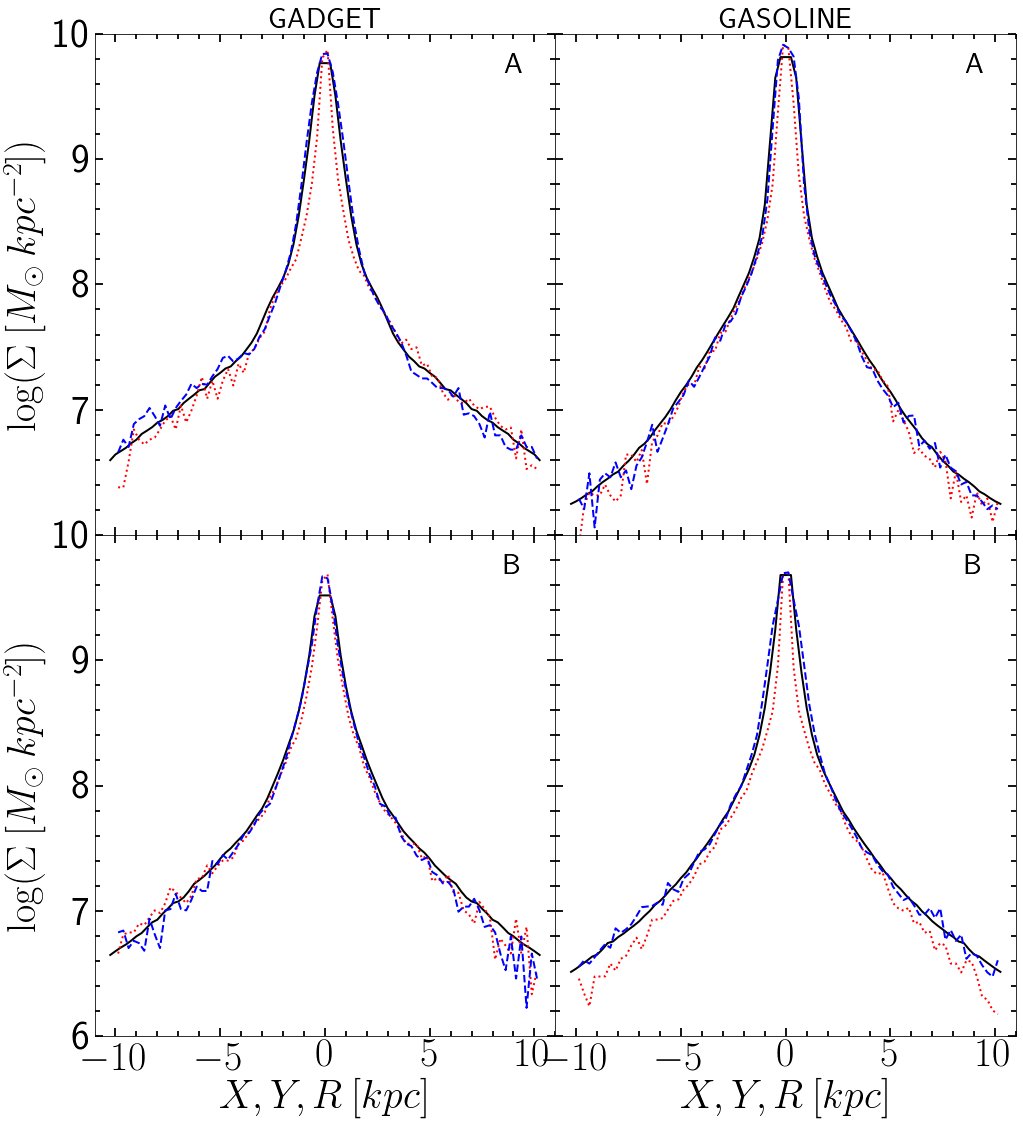

In [19]:
#-----grafico-----------
# fig=plt.figure(1,figsize=(16,16))
# fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.92, top = 0.95, wspace=0., hspace= -0.3)
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.patches as patches
from matplotlib.colors import LogNorm


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16), sharex=True) #,sharey=True)#, sharex=True,
#                        gridspec_kw = {'height_ratios':[2,1,2,1]})
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.90, top = 0.95, wspace=0, hspace= 0)



ax[0,0].plot(bines, np.log10(density_M31gd*1e10),'-', lw=2, color = 'k')
ax[0,0].plot(abine, np.log10(masay_M31gd*1e10/area_bines),':', lw=2, color = 'r')
ax[0,0].plot(abine, np.log10(masax_M31gd*1e10/area_bines),'--', lw=2, color = 'b')
ax[0,0].set_xlim(-11,11)
ax[0,0].set_xticks([-10,-5,0,5,10])
ax[0,0].set_ylim(6,10)
ax[0,0].set_yticks([7,8,9,10])
ax[0,0].set_yticklabels([7,8,9,10])
ax[0,0].set_ylabel(r'$\log(\Sigma \: [M_{\odot} \: kpc^{-2}])$',fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(9, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)

#---------------------------------

# ax=fig.add_subplot(222)
ax[0,1].plot(bines, np.log10(density_M31gs),'-', lw=2, color = 'k')
ax[0,1].plot(abine, np.log10(masay_M31gs/area_bines),':', lw=2, color = 'r')
ax[0,1].plot(abine, np.log10(masax_M31gs/area_bines),'--', lw=2, color = 'b')
# ax[0,1].set_yscale('log')
# ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(6,10)
ax[0,1].set_yticklabels([7,8,9,10])
ax[0,1].set_yticklabels([])
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(9, 9.75,'A', fontsize=30, color='k', ha='center', va='center') 
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)

#---------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(bines, np.log10(density_MWgd*1e10),'-', lw=2, color = 'k')
ax[1,0].plot(abine, np.log10(masay_MWgd*1e10/area_bines),':', lw=2, color = 'r')
ax[1,0].plot(abine, np.log10(masax_MWgd*1e10/area_bines),'--', lw=2, color = 'b')
# ax[2,0].set_xlim(-5,5)
ax[1,0].set_ylim(6,10)
ax[1,0].set_yticks([6,7,8,9,10])
ax[1,0].set_yticklabels([6,7,8,9,10])
# ax[2,0].set_xticklabels([])
ax[1,0].set_xlabel(r'$X, Y, R\:[kpc]$', fontsize=40)
ax[1,0].set_ylabel(r'$\log(\Sigma \: [M_{\odot} \: kpc^{-2}])$',fontsize=40)
# ax[1,0].set_yscale('log')
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(9, 9.75,'B', fontsize=30, color='k', ha='center', va='center')

#---------------------------------

# ax4=fig.add_subplot(224)
ax[1,1].plot(bines, np.log10(density_MWgs),'-', lw=2, color = 'k')
ax[1,1].plot(abine, np.log10(masay_MWgs/area_bines),':', lw=2, color = 'r')
ax[1,1].plot(abine, np.log10(masax_MWgs/area_bines),'--', lw=2, color = 'b')
# ax[2,1].set_xlim(-5,5)
ax[1,1].set_ylim(6,10)
ax[1,1].set_yticks([6,7,8,9,10])
ax[1,1].set_yticklabels([6,7,8,9,10])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$X, Y, R\:[kpc]$', fontsize=40)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,1].text(9, 9.75,'B', fontsize=30, color='k', ha='center', va='center') 
# ax[1,1].plot(0,0,'k+', markersize=20, color='k')


# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Barras.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/perfiles.pdf', dpi = 100, xxbox_inches='tight')
plt.show()
